## 测量因子

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

from factorFactory import FactorFactory
from Util import evaluate_time_series_ic, evaluate_time_series_ic
import matplotlib.pyplot as plt

### （1）预处理数据：

In [12]:
df = pd.read_csv ('df_minute.csv')
df.shape

(180273, 16)

In [14]:
df[df.isnull().any(axis=1)]

,timestamp,open,high,low,close,volume,dollar_volume,vwap,tick_count,trade_size_mean,trade_size_std,zero_return_count,price_direction_ratio,large_trade_count,large_trade_ratio,large_trade_volume_ratio
148,2025-01-02 11:28:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
331,2025-01-02 14:31:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
332,2025-01-02 14:32:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
333,2025-01-02 14:33:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
334,2025-01-02 14:34:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180014,2025-05-07 09:14:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
180026,2025-05-07 09:26:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
180074,2025-05-07 10:14:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
180097,2025-05-07 10:37:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0


In [ ]:
finfact = FactorFactory ()
df = finfact.generate_factors (df, include_bounded_factors=False)
df.shape

In [15]:
# 去掉 null
df = df.dropna()

# 计算每列的缺失值数量
null_counts = df.isnull().sum()
# 只保留那些缺失值数 > 0 的列
null_counts = null_counts[null_counts > 0]
print(null_counts)
df.shape, df.columns

Series([], dtype: int64)


((27205, 16),
 Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'dollar_volume',
        'vwap', 'tick_count', 'trade_size_mean', 'trade_size_std',
        'zero_return_count', 'price_direction_ratio', 'large_trade_count',
        'large_trade_ratio', 'large_trade_volume_ratio'],
       dtype='object'))

In [ ]:
d

### （3）评测因子：

#### IC分析

In [5]:
results = evaluate_time_series_ic(
    df=df,
    factors=df.columns.tolist(),
    target_col='close',
    forward=5,        # 往后 3 个 timestamp
    date_col='timestamp',
    window=100,
    n_jobs=8
)
results

,ic_global,ic_sw_mean,ic_sw_std,ir_sw
factor,,,,
open,-0.004029,-0.292806,0.168985,-1.732737
high,-0.004038,-0.302160,0.172801,-1.748599
low,-0.004040,-0.301218,0.171495,-1.756425
close,-0.004051,-0.309725,0.174637,-1.773536
volume,0.006676,0.010062,0.155473,0.064719
rsi_6_open,-0.017196,-0.099311,0.171454,-0.579230
rsi_6_close,-0.021918,-0.110102,0.175971,-0.625685
rsi_6_high,-0.019038,-0.106178,0.176350,-0.602086
rsi_6_low,-0.018721,-0.105818,0.175957,-0.601384


In [6]:
# 选择出优质因子
results[results['ic_global'].abs () > 0.02]

,ic_global,ic_sw_mean,ic_sw_std,ir_sw
factor,,,,
rsi_6_close,-0.021918,-0.110102,0.175971,-0.625685
bb_pband_10_1.5,-0.022982,-0.085461,0.169866,-0.503107
bb_pband_10_2.0,-0.022982,-0.085461,0.169866,-0.503107
bb_pband_10_2.5,-0.022982,-0.085461,0.169866,-0.503107


#### 相关性检测

In [7]:
usable_factors = results.loc[results['ic_global'].abs() > 0.02].index.tolist()
df_filtered = df[usable_factors]

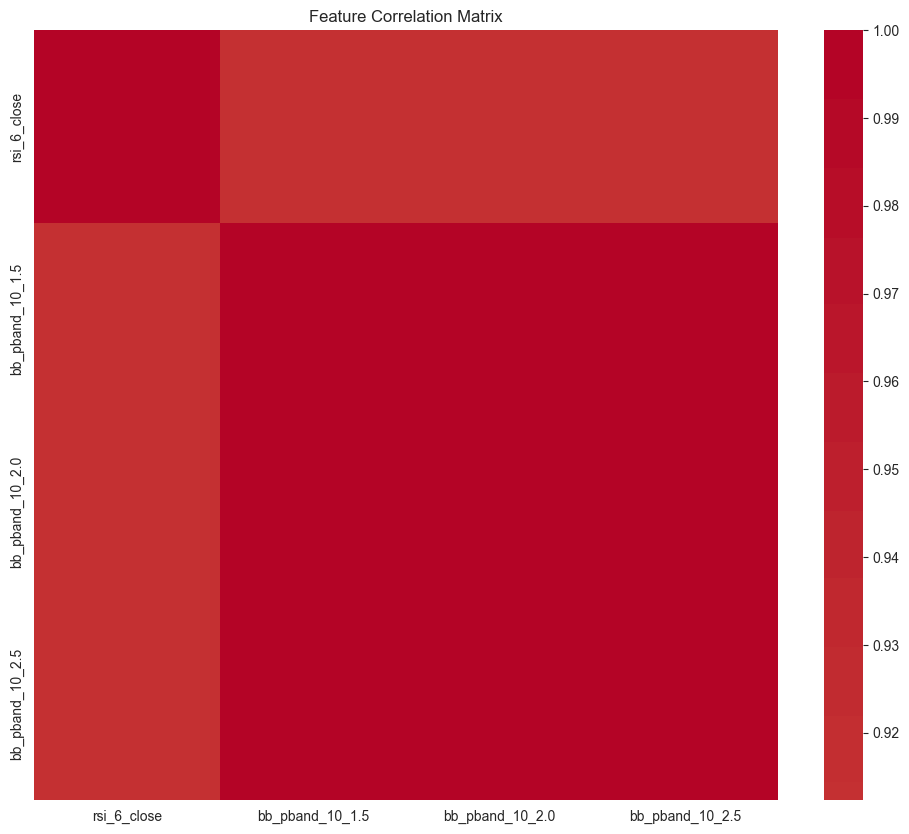

In [8]:
corr = pd.DataFrame(df_filtered).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

#### PCA分析

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_filtered)
percent = 0.6

cumulative = np.cumsum(pca.explained_variance_ratio_)
n_PCs = np.argmax(cumulative >= percent) + 1

print(f"前 {n_PCs} 个主成分累计解释了 {cumulative[n_PCs - 1]:.2%} 的方差")
feature_names = df_filtered.columns

# 打印所有有重大贡献的主成分
for i in range(n_PCs):
    # 第 i 个主成分的系数
    pc = pca.components_[i]
    
    # 取绝对值最大的特征位置
    top_feature_idx = np.argmax(np.abs(pc))
    top_feature_name = feature_names[top_feature_idx]
    
    print(f"PC{i+1} 的主导因子是: {top_feature_name}（贡献系数: {pc[top_feature_idx]:.4f}）")

前 1 个主成分累计解释了 99.98% 的方差
PC1 的主导因子是: rsi_6_close（贡献系数: 0.9996）
